Here we include all the libraries required in the code

In [2]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt

Reading images and the converting it into grayscale for easy computation

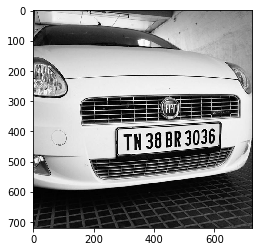

In [3]:
image = cv2.imread('numberplate/numberplate7.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

Here we apply a specific typ of advanced gaussian filter to smoothen out the image from any noise

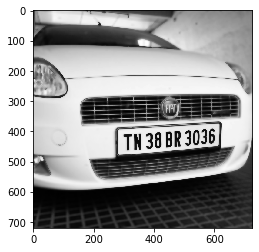

In [4]:
blur = cv2.bilateralFilter(gray, 11,90, 90)
plt.imshow(blur,cmap='gray')

This block is to show the otsu thresholding operation and also you can check out the erosion and dilation to check that version also as mentioned in the paper

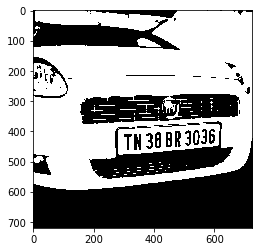

In [5]:
thresh = cv2.threshold(blur, 150, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
erode = cv2.erode(thresh, None, iterations=2)
dilate = cv2.dilate(thresh, None, iterations=4)
plt.imshow(thresh,cmap='gray')
plt.show()

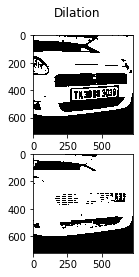

In [7]:
plt.subplot(2,1,1)
plt.suptitle('Erosion')
plt.imshow(erode,cmap='gray')
plt.suptitle('Dilation')
plt.subplot(2,1,2)
plt.imshow(dilate,cmap='gray')
plt.show()

Actually we don't need to explicitly define the thresholding as it internally happens when you implement Canny edge detection algorithm as shown below. Also CCA internally happens in that findContours section so no requirement of explicitely doing it.

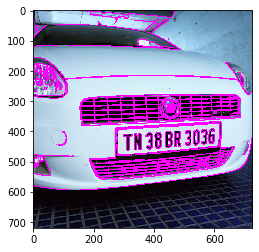

In [8]:
edges = cv2.Canny(blur, 30, 200)
cnts, new = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)
plt.imshow(image_copy)
plt.show()

We find the densely packed connected components which would be the number plate as lot of changes among pixels happen in the numberplate section.

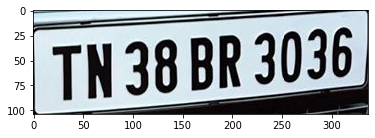

In [9]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break
plt.imshow(plate)
plt.show()

In the below lines of code it specifically calls the pretrained CNN and the output string is printed which would be th recognized character in order as there won't be any outliers due to pretrained CNN .Hence RANSAC is not required.

In [10]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [11]:
text=pytesseract.image_to_string(plate)
print(text)

TN 38BR 3036
